In [19]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [20]:
!kaggle datasets download -d sanskar457/fraud-transaction-detection

Dataset URL: https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection
License(s): DbCL-1.0
fraud-transaction-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
from zipfile import ZipFile
dataset='/content/fraud-transaction-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('/content/Final Transactions.csv')
# # Define features and target variable
# features = ['CUSTOMER_ID', 'TERMINAL_ID', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD', 'TX_FRAUD_SCENARIO']
# target = 'TX_AMOUNT'

df = df.drop(columns=["Unnamed: 0", "TRANSACTION_ID", "TX_FRAUD", "TX_FRAUD_SCENARIO"])
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['month'] = df['TX_DATETIME'].dt.month
df['day'] = df['TX_DATETIME'].dt.day
df = df.sort_values('TX_DATETIME')

In [23]:
df.head(1005)

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,month,day
0,2023-01-01 00:00:31,596,3156,533.07,31,0,1,1
1,2023-01-01 00:02:10,4961,3412,808.56,130,0,1,1
2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,2023-01-01 00:09:29,4128,8737,620.65,569,0,1,1
4,2023-01-01 00:10:34,927,9906,490.66,634,0,1,1
...,...,...,...,...,...,...,...,...
1000,2023-01-01 05:31:44,1889,5651,1474.26,19904,0,1,1
1001,2023-01-01 05:32:07,3815,1840,1039.06,19927,0,1,1
1002,2023-01-01 05:32:46,4834,4673,758.70,19966,0,1,1
1003,2023-01-01 05:32:49,1608,5576,524.11,19969,0,1,1


In [6]:
# from scipy.stats import zscore

# # Calculate Z-scores
# z_scores = zscore(df['TX_AMOUNT'])

# # Define threshold
# threshold = 3

# # Identify outliers
# outliers_zscore = df['TX_AMOUNT'][abs(z_scores) > threshold]

# print(f"Outliers using Z-Score: \n{outliers_zscore}")


Outliers using Z-Score: 
10379       6435.75
11724       7788.25
18260      24820.00
18407       4960.50
21376       5713.50
             ...   
1751380    28392.25
1752248    18170.25
1752776    11792.00
1753081    17355.00
1753524     6067.25
Name: TX_AMOUNT, Length: 3448, dtype: float64


LSTM

Enter the CUSTOMER_ID: 3217
Epoch 1/20


<ipython-input-24-7989f7976200>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer['TX_DATETIME'] = pd.to_datetime(df_customer['TX_DATETIME'])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2724 - val_loss: 0.1461
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1368 - val_loss: 0.1290
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1135 - val_loss: 0.1169
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1050 - val_loss: 0.1130
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0963 - val_loss: 0.1116
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0974 - val_loss: 0.1093
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0963 - val_loss: 0.1063
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0923 - val_loss: 0.1061
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0943 - val_loss: 0.1043
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0916 - val_loss: 0.1030
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0819 - val_loss: 0.1027
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0884 - val_l

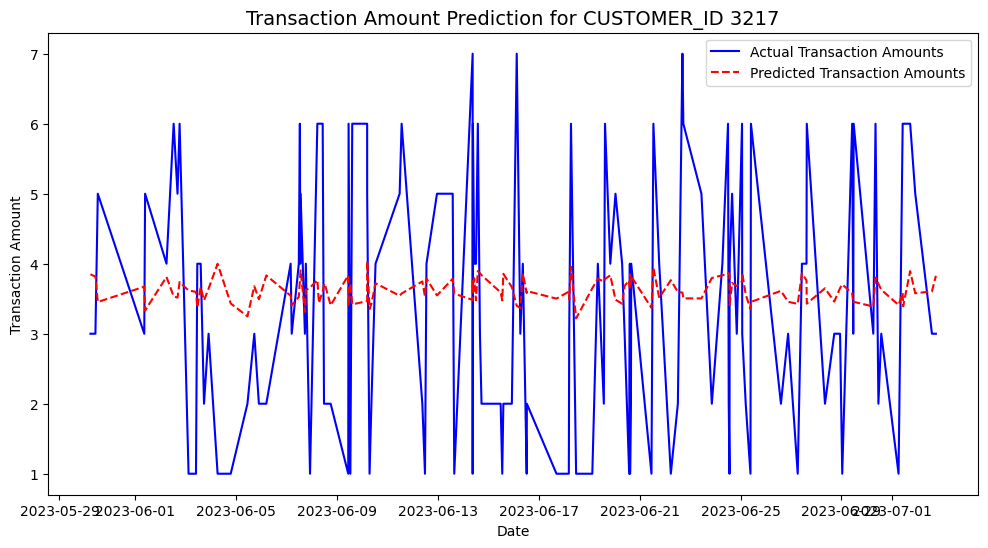

Mean Absolute Error (MAE): 1.6074478733808475
Mean Squared Error (MSE): 3.4351280307361285
Root Mean Squared Error (RMSE): 1.8534098388473415


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

customer_id_input = int(input("Enter the CUSTOMER_ID: "))
df_customer = df[df['CUSTOMER_ID'] == customer_id_input]
df_customer['TX_DATETIME'] = pd.to_datetime(df_customer['TX_DATETIME'])
df_customer = df_customer.sort_values('TX_DATETIME')

df_customer['day'] = df_customer['TX_DATETIME'].dt.day
df_customer['month'] = df_customer['TX_DATETIME'].dt.month

df_customer = df_customer[['TX_DATETIME', 'TX_AMOUNT', 'day', 'month']]
df_customer.set_index('TX_DATETIME', inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_amounts = scaler.fit_transform(df_customer['TX_AMOUNT'].values.reshape(-1, 1))
scaled_days = scaler.fit_transform(df_customer['day'].values.reshape(-1, 1))
scaled_months = scaler.fit_transform(df_customer['month'].values.reshape(-1, 1))

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length, :-1])
        labels.append(data[i+seq_length, -1])
    return np.array(sequences), np.array(labels)

combined_data = np.column_stack((scaled_amounts, scaled_days, scaled_months))

seq_length = 30
X, y = create_sequences(combined_data, seq_length)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predicted_amounts = model.predict(X_test)

predicted_amounts = predicted_amounts[:, -1, 0]

predicted_amounts = scaler.inverse_transform(predicted_amounts.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(df_customer.index[-len(y_test_actual):], y_test_actual, color='blue', label='Actual Transaction Amounts')
plt.plot(df_customer.index[-len(y_test_actual):], predicted_amounts, color='red', linestyle='dashed', label='Predicted Transaction Amounts')
plt.title(f'Transaction Amount Prediction for CUSTOMER_ID {customer_id_input}', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test_actual, predicted_amounts)
mse = mean_squared_error(y_test_actual, predicted_amounts)
rmse = math.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Enter the CUSTOMER_ID: 3217


<ipython-input-18-e6c5eb87eaa9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer['TX_DATETIME'] = pd.to_datetime(df_customer['TX_DATETIME'])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0966 - val_loss: 0.0650
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0538 - val_loss: 0.0427
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0462 - val_loss: 0.0392
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0422 - val_loss: 0.0372
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0425 - val_loss: 0.0361
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0442 - val_loss: 0.0383
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0396 - val_loss: 0.0359
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0464 - val_loss: 0.0432
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0443 - val_loss: 0.0392
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0393 - val_loss: 0.0351
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0421 - val_loss: 0.0378
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

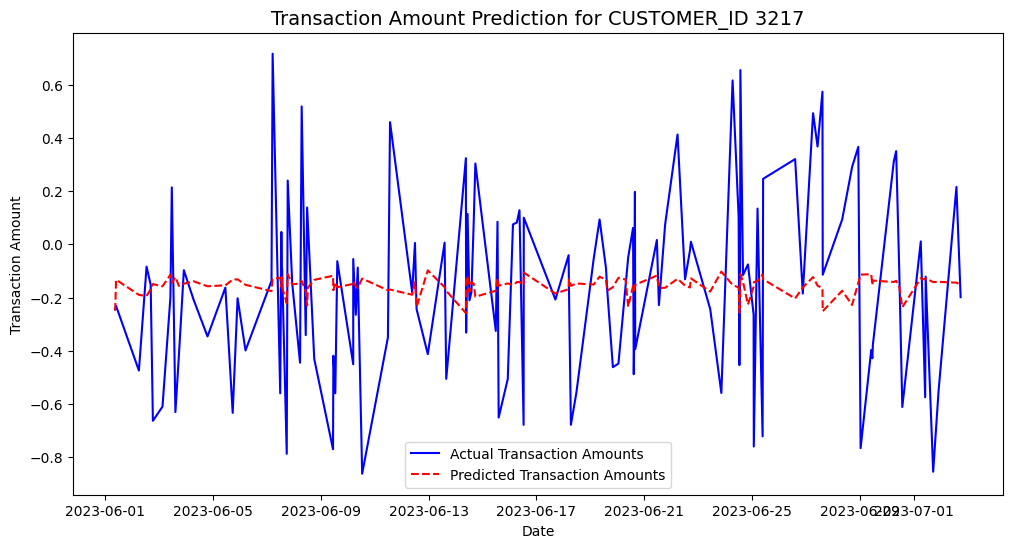

Mean Absolute Error (MAE): 0.28063482728887545
Mean Squared Error (MSE): 0.12233709174484568
Root Mean Squared Error (RMSE): 0.34976719649624904


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from tensorflow.keras.callbacks import EarlyStopping

customer_id_input = int(input("Enter the CUSTOMER_ID: "))
df_customer = df[df['CUSTOMER_ID'] == customer_id_input]
df_customer['TX_DATETIME'] = pd.to_datetime(df_customer['TX_DATETIME'])
df_customer = df_customer.sort_values('TX_DATETIME')

df_customer['day'] = df_customer['TX_DATETIME'].dt.day
df_customer['month'] = df_customer['TX_DATETIME'].dt.month

df_customer['day_sin'] = np.sin(2 * np.pi * df_customer['day'] / 31)
df_customer['day_cos'] = np.cos(2 * np.pi * df_customer['day'] / 31)
df_customer['month_sin'] = np.sin(2 * np.pi * df_customer['month'] / 12)
df_customer['month_cos'] = np.cos(2 * np.pi * df_customer['month'] / 12)

df_customer = df_customer[['TX_DATETIME', 'TX_AMOUNT', 'day_sin', 'day_cos', 'month_sin', 'month_cos']]
df_customer.set_index('TX_DATETIME', inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_amounts = scaler.fit_transform(df_customer['TX_AMOUNT'].values.reshape(-1, 1))
scaled_day_sin = scaler.fit_transform(df_customer['day_sin'].values.reshape(-1, 1))
scaled_day_cos = scaler.fit_transform(df_customer['day_cos'].values.reshape(-1, 1))
scaled_month_sin = scaler.fit_transform(df_customer['month_sin'].values.reshape(-1, 1))
scaled_month_cos = scaler.fit_transform(df_customer['month_cos'].values.reshape(-1, 1))

combined_data = np.column_stack((scaled_amounts, scaled_day_sin, scaled_day_cos, scaled_month_sin, scaled_month_cos))

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length, :-1])
        labels.append(data[i+seq_length, 0])
    return np.array(sequences), np.array(labels)


seq_length = 30
X, y = create_sequences(combined_data, seq_length)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
predicted_amounts = model.predict(X_test)

predicted_amounts = scaler.inverse_transform(predicted_amounts.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(df_customer.index[-len(y_test_actual):], y_test_actual, color='blue', label='Actual Transaction Amounts')
plt.plot(df_customer.index[-len(y_test_actual):], predicted_amounts, color='red', linestyle='dashed', label='Predicted Transaction Amounts')
plt.title(f'Transaction Amount Prediction for CUSTOMER_ID {customer_id_input}', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test_actual, predicted_amounts)
mse = mean_squared_error(y_test_actual, predicted_amounts)
rmse = math.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Enter the CUSTOMER_ID: 3217


<ipython-input-22-cc3c2d19e542>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer['TX_DATETIME'] = pd.to_datetime(df_customer['TX_DATETIME'])


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - loss: 0.2095 - val_loss: 0.0379
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0289 - val_loss: 0.0335
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0188 - val_loss: 0.0210
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - loss: 0.0138 - val_loss: 0.0188
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 0.0159 - val_loss: 0.0184
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0141 - val_loss: 0.0211
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0154 - val_loss: 0.0213
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - loss: 0.0179 - val_loss: 0.0193
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.0143 - val_loss: 0.0194
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0148 - val_loss: 0.0184
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0132 - val_loss: 0.0186
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 

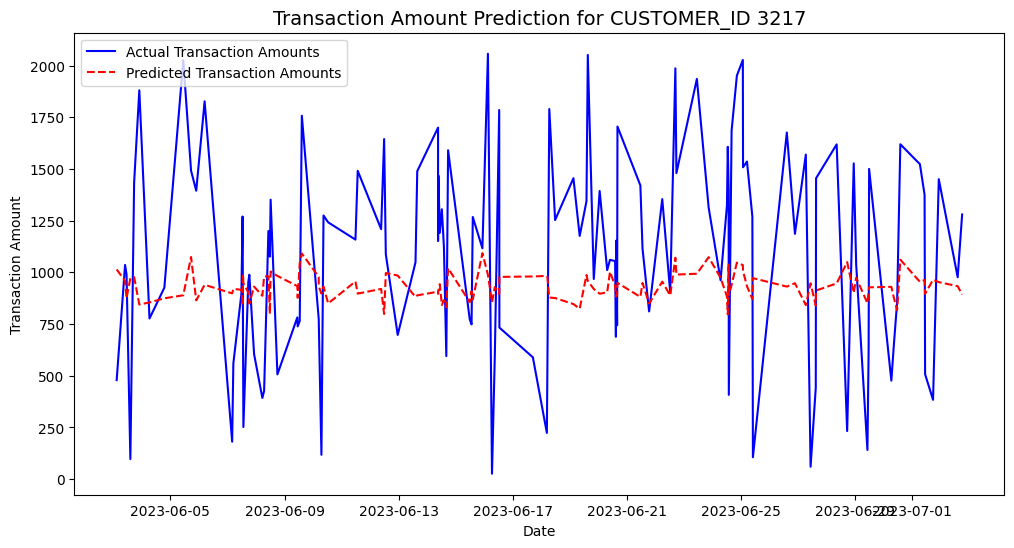

MAE: 443.94485811138463
MSE: 278014.1653195553
RMSE: 527.270485917385


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Attention, Input, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from tensorflow.keras.callbacks import EarlyStopping

customer_id_input = int(input("Enter the CUSTOMER_ID: "))
df_customer = df[df['CUSTOMER_ID'] == customer_id_input]
df_customer['TX_DATETIME'] = pd.to_datetime(df_customer['TX_DATETIME'])
df_customer = df_customer.sort_values('TX_DATETIME')

df_customer['day'] = df_customer['TX_DATETIME'].dt.day
df_customer['month'] = df_customer['TX_DATETIME'].dt.month

df_customer['day_sin'] = np.sin(2 * np.pi * df_customer['day'] / 31)
df_customer['day_cos'] = np.cos(2 * np.pi * df_customer['day'] / 31)
df_customer['month_sin'] = np.sin(2 * np.pi * df_customer['month'] / 12)
df_customer['month_cos'] = np.cos(2 * np.pi * df_customer['month'] / 12)

df_customer['TX_AMOUNT_LOG'] = np.log1p(df_customer['TX_AMOUNT'])

df_customer['TX_AMOUNT_LAG1'] = df_customer['TX_AMOUNT_LOG'].shift(1)
df_customer['TX_AMOUNT_LAG7'] = df_customer['TX_AMOUNT_LOG'].shift(7)
df_customer['TX_AMOUNT_MOVING_AVG7'] = df_customer['TX_AMOUNT_LOG'].rolling(7).mean()
df_customer['TX_AMOUNT_MOVING_AVG30'] = df_customer['TX_AMOUNT_LOG'].rolling(30).mean()

df_customer.dropna(inplace=True)

features = ['TX_AMOUNT_LOG', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
            'TX_AMOUNT_LAG1', 'TX_AMOUNT_LAG7', 'TX_AMOUNT_MOVING_AVG7', 'TX_AMOUNT_MOVING_AVG30']
df_customer = df_customer[['TX_DATETIME'] + features]
df_customer.set_index('TX_DATETIME', inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_customer)

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length, 0])
    return np.array(sequences), np.array(labels)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_out = Bidirectional(LSTM(units=128, return_sequences=True))(input_layer)
lstm_out = Dropout(0.2)(lstm_out)
lstm_out = Bidirectional(LSTM(units=64, return_sequences=True))(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

attention = Attention()([lstm_out, lstm_out])
flattened = Flatten()(attention)

dense_out = Dense(units=32, activation='relu')(flattened)
dense_out = Dense(units=1)(dense_out)

model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

predicted_scaled = model.predict(X_test)

predicted_amounts_log = scaler.inverse_transform(np.hstack((predicted_scaled, np.zeros((len(predicted_scaled), X.shape[2] - 1)))))[:, 0]
predicted_amounts = np.expm1(predicted_amounts_log)

y_test_actual_log = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), X.shape[2] - 1)))))[:, 0]
y_test_actual = np.expm1(y_test_actual_log)

plt.figure(figsize=(12, 6))
plt.plot(df_customer.index[-len(y_test_actual):], y_test_actual, color='blue', label='Actual Transaction Amounts')
plt.plot(df_customer.index[-len(y_test_actual):], predicted_amounts, color='red', linestyle='dashed', label='Predicted Transaction Amounts')
plt.title(f'Transaction Amount Prediction for CUSTOMER_ID {customer_id_input}', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test_actual, predicted_amounts)
mse = mean_squared_error(y_test_actual, predicted_amounts)
rmse = math.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


Enter the Customer ID to analyze: 3217


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Mean Squared Error for customer 3217: 5942042.274764542


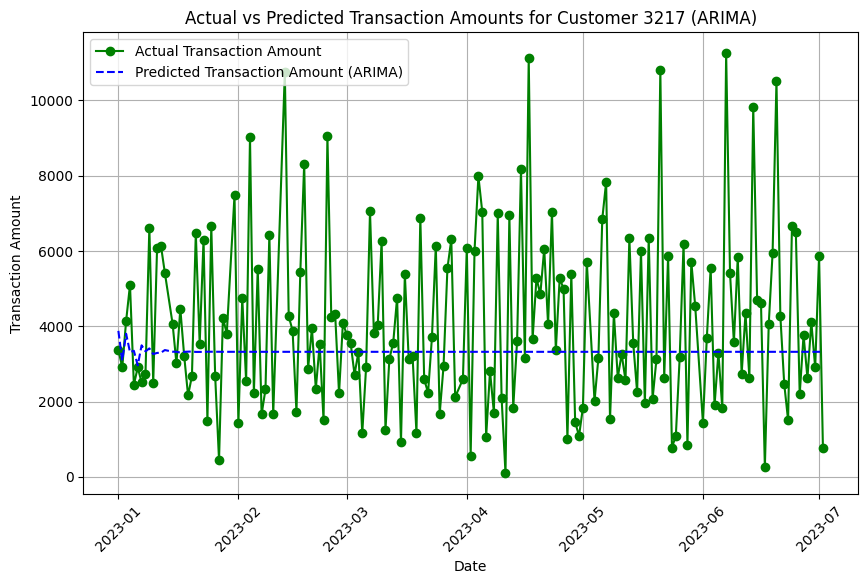

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

df['date'] = pd.to_datetime(df['TX_DATETIME']).dt.date
df_grouped = df.groupby(['CUSTOMER_ID', 'date']).agg({'TX_AMOUNT': 'sum'}).reset_index()

def train_and_predict_arima(customer_id):
    customer_data = df_grouped[df_grouped['CUSTOMER_ID'] == customer_id]
    customer_data = customer_data.sort_values('date')

    if customer_data.empty:
        print(f"No data available for customer ID {customer_id}")
        return

    customer_data['date'] = pd.to_datetime(customer_data['date'])
    customer_data.set_index('date', inplace=True)

    ts_data = customer_data['TX_AMOUNT']

    model = ARIMA(ts_data, order=(5, 1, 0))
    model_fit = model.fit()

    y_pred = model_fit.forecast(steps=len(ts_data))

    mse = mean_squared_error(ts_data, y_pred)
    print(f'Mean Squared Error for customer {customer_id}: {mse}')

    plt.figure(figsize=(10, 6))
    plt.plot(customer_data.index, ts_data, label='Actual Transaction Amount', color='green', marker='o')
    plt.plot(customer_data.index, y_pred, label='Predicted Transaction Amount (ARIMA)', color='blue', linestyle='--')

    plt.title(f"Actual vs Predicted Transaction Amounts for Customer {customer_id} (ARIMA)")
    plt.xlabel('Date')
    plt.ylabel('Transaction Amount')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

customer_id_input = int(input("Enter the Customer ID to analyze: "))
train_and_predict_arima(customer_id_input)


Enter the Customer ID to analyze: 3217


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model saved as 'arima_model_customer_3217.pkl'
MAE: 2132.734, MSE: 7168130.586, RMSE: 2677.336


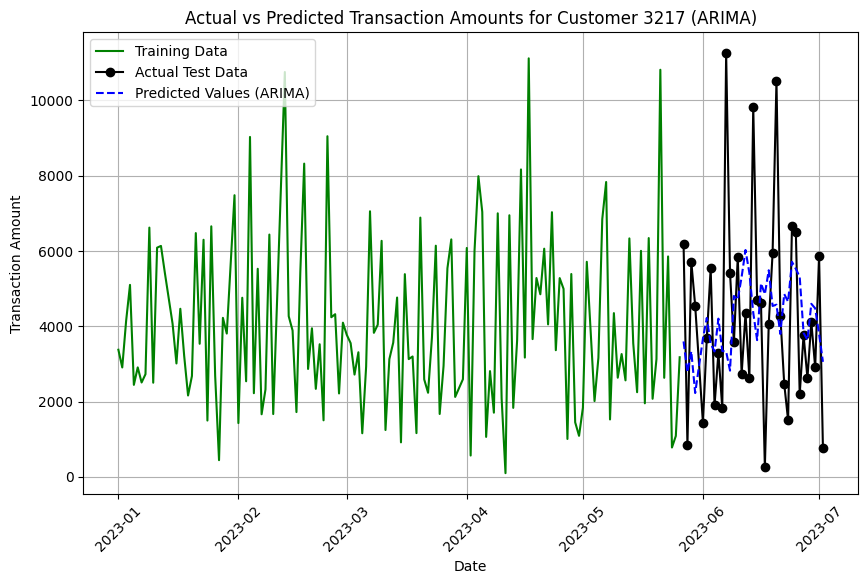

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['date'] = df['TX_DATETIME'].dt.date
df_grouped = df.groupby(['CUSTOMER_ID', 'date']).agg({'TX_AMOUNT': 'sum'}).reset_index()

def train_and_predict_arima(customer_id):
    customer_data = df_grouped[df_grouped['CUSTOMER_ID'] == customer_id]
    customer_data = customer_data.sort_values('date')

    if customer_data.empty:
        print(f"No data available for customer ID {customer_id}")
        return None

    customer_data['date'] = pd.to_datetime(customer_data['date'])
    customer_data.set_index('date', inplace=True)

    ts_data = customer_data['TX_AMOUNT']

    train_size = int(len(ts_data) * 0.8)
    train, test = ts_data[:train_size], ts_data[train_size:]

    model = ARIMA(train, order=(5, 1, 0))
    model_fit = model.fit()

    model_filename = f'arima_model_customer_{customer_id}.pkl'
    with open(model_filename, 'wb') as model_file:
        pickle.dump(model_fit, model_file)

    print(f"Model saved as '{model_filename}'")

    history = list(train)
    predictions = []

    for t in range(len(test)):
        model = ARIMA(history, order=(5, 1, 0))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test.iloc[t])

    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)

    print(f'MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}')

    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Training Data', color='green')
    plt.plot(test.index, test, label='Actual Test Data', color='black', marker='o')
    plt.plot(test.index, predictions, label='Predicted Values (ARIMA)', color='blue', linestyle='--')

    plt.title(f"Actual vs Predicted Transaction Amounts for Customer {customer_id} (ARIMA)")
    plt.xlabel('Date')
    plt.ylabel('Transaction Amount')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

    return model_filename

customer_id_input = int(input("Enter the Customer ID to analyze: "))
saved_model_path = train_and_predict_arima(customer_id_input)


In [31]:
from joblib import dump, load
dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']